# Clustering

##### Dimensionality reduction
- clustering 에 미치는 영향에 따라 하는 것 : PCA

##### K-means algorithm
- 평균을 이용하는 알고리즘
- mutation(돌연변이)에 따라 평균이 크게 차이가 난다. 정규분포가 아님. noise 등을 제거하고 사용해야 한다.

##### DBSCAN algorithm
- 밀도(Dense) R(반지름)을 통한 반경을 통해 몇개를 포함하는 지를 설정하고, 포함되는 것을 이용할 지 안할 지를 결정하는 것.

## Cluster Analysis

- 밀접하게 관련되어 있는 것끼리 묶는 것.
- 그렇다면 밀접하다는 것을 어떻게 판단할 것인가?

### 데이터 간 유사도
##### Mincovski distance

##### cosine distance

##### Jaccard distnace 
- 예) 수치적으로 판단이 안되는 색깔(R, G, B 같은 것을 이용)

##### Weightd distance
- 오브젝트가 수치 데이터 + 카테고리 데이터 일때 이용함.

### 주요 클러스터링 기법

##### partitioning approach
###### K-means
- K로 구간을 나눈다. 각 구간의 평균에 따라.
- 문제는 경계에 있는 것에 대한 것 -> 이를 해결하기 위해서는 clustering 을 변화가 없을 때까지 반복적으로 수행한다

##### Hierarchical approach
- 계층이 여러 개 -> 소수 or 소수 -> 여러 개

##### Density-based approach
- Dense에 포함되지 않는 것을 Outlier라고 하여 따로 정의하는 방식

### Cluster 간의 거리

##### Single Link
- 두 클러스터의 오브젝트 간 거리들 중 최소 거리

##### Complete Link
- 두 클러스터의 오브젝트 간 거리들 중 최대 거리

##### Average
- 두 클러스터의 모든 오브젝트 간 거리의 평균

##### Centroid
- 두 클러스터의 중심점 간 거리

##### Medoid
- 두 클러스터의 Medoid 간 거리. 
- Medoid : 클러스터 중심점에 가장 가까운 오브젝트. 정규분포라면 큰 차이가 나지 않겠지만. Mutation에 의한 영향이 큰 경우에는 이게 더 유용할 때도 있을 듯.

### 차원 축소

##### PCA(Principal Component Analysis)
- 고차원 데이터의 정보 손실을 최소화하면서 저차원 데이터로 변환하는 기법
- covariance matrix 의 eigen value 와 vector 를 계산하는 방식으로 계산된다. 큰 값을 기준으로 하면 분포를 더 잘 보여줄 수 있다.

In [1]:
import csv 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler

In [2]:
d = np.array([[170, 70], [150, 45], [160, 55], [180, 60], [170, 80]])
d

array([[170,  70],
       [150,  45],
       [160,  55],
       [180,  60],
       [170,  80]])

In [3]:
z = d - np.mean(d, axis = 0)
z

array([[  4.,   8.],
       [-16., -17.],
       [ -6.,  -7.],
       [ 14.,  -2.],
       [  4.,  18.]])

##### Covariance matrix

In [4]:
sig = np.matmul(z.T, z) / 5
sig

array([[104.,  78.],
       [ 78., 146.]])

##### SVD (Single Value Decomposition)

In [5]:
print(np.linalg.svd(sig)) 

(array([[-0.60828716, -0.79371704],
       [-0.79371704,  0.60828716]]), array([205.77747211,  44.22252789]), array([[-0.60828716, -0.79371704],
       [-0.79371704,  0.60828716]]))


- [-0.60828716, -0.79371704] 가 정보량을 205.77..만큼 포함한다는 것
- [-0.79371704,  0.60828716] 가 정보량을 44.22.. 만큼 포함한다는 것

##### Using scikit-learn

In [6]:
from sklearn.decomposition import PCA

In [7]:
d = np.array([[170, 70], [150, 45], [160, 55], [180, 60], [170, 80]])
d

array([[170,  70],
       [150,  45],
       [160,  55],
       [180,  60],
       [170,  80]])

In [8]:
d_pca = PCA(n_components=2).fit_transform(d)
d_pca

array([[ -8.78288493,  -1.69142909],
       [ 23.22578413,  -2.35859097],
       [  9.2057422 ,  -0.50429214],
       [ -6.9285861 ,  12.32861285],
       [-16.72005531,  -7.77430064]])

In [9]:
col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count","dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]
path = './datasets/w.csv'
data = pd.read_csv(path, names = col_names)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [10]:
data['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [11]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [12]:
data.shape

(494021, 42)

In [13]:
unique_labels = data['label'].unique() # 고유 요소 반환 집합 같은 느낌으로 {1, 2, 3, 4, 5, 1, 2, 3, 4, 5,} 있으면 {1, 2, 3, 4, 5} 만 반환함.
unique_labels

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [14]:
selected_data = pd.DataFrame()

for label in unique_labels :
    selected_data = pd.concat([selected_data, data.loc[data['label'] == label][:400]])

selected_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142477,0,tcp,ftp_data,SF,0,5636,0,0,0,0,...,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00,rootkit.
148154,61,tcp,telnet,SF,294,3929,0,0,0,0,...,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25,rootkit.
397011,0,udp,other,SF,32,0,0,0,0,0,...,1,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.00,rootkit.
452001,0,udp,other,SF,4,4,0,0,0,0,...,1,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.00,rootkit.


In [15]:
selected_data['label'].value_counts()

ipsweep.            400
smurf.              400
warezclient.        400
back.               400
satan.              400
neptune.            400
normal.             400
teardrop.           400
portsweep.          400
pod.                264
nmap.               231
guess_passwd.        53
buffer_overflow.     30
land.                21
warezmaster.         20
imap.                12
rootkit.             10
loadmodule.           9
ftp_write.            8
multihop.             7
phf.                  4
perl.                 3
spy.                  2
Name: label, dtype: int64

In [16]:
labels = selected_data['label'].to_numpy() # 이후 일관된 평가를 위해 저장.
labels

array(['normal.', 'normal.', 'normal.', ..., 'rootkit.', 'rootkit.',
       'rootkit.'], dtype=object)

In [17]:
data = selected_data.drop('label', axis = 1) # 1이 열 제거.
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142477,0,tcp,ftp_data,SF,0,5636,0,0,0,0,...,1,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00
148154,61,tcp,telnet,SF,294,3929,0,0,0,0,...,255,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25
397011,0,udp,other,SF,32,0,0,0,0,0,...,255,1,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.00
452001,0,udp,other,SF,4,4,0,0,0,0,...,1,1,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.00


- Step1. Centroids 초기화 
- Step2. 오브젝트들을 가장 가까운 Centroid의 클러스터로 지정 
- Step3. 각 클러스터의 새로운 Centroid를 계산
- Step4. Centroid가 수렴할 때까지 반복

In [18]:
# _의 자리에는 각 숫자가 어떤 것이었는지 기록함. 지금은 안쓸 것이므로 없앰.
data['protocol_type'], _ = data['protocol_type'].factorize()
data['service'], _ = data['service'].factorize()
data['flag'], _ = data['flag'].factorize()

data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,181,5450,0,0,0,0,...,9,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00
1,0,0,0,0,239,486,0,0,0,0,...,19,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00
2,0,0,0,0,235,1337,0,0,0,0,...,29,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
3,0,0,0,0,219,1337,0,0,0,0,...,39,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
4,0,0,0,0,217,2032,0,0,0,0,...,49,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142477,0,0,6,0,0,5636,0,0,0,0,...,1,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00
148154,61,0,5,0,294,3929,0,0,0,0,...,255,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25
397011,0,1,30,0,32,0,0,0,0,0,...,255,1,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.00
452001,0,1,30,0,4,4,0,0,0,0,...,1,1,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.00


In [19]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [20]:
data[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.61041764e-07, 1.05713002e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.56555773e-02, 1.56555773e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.14960630e-02,
       3.14960630e-02, 1.00000000e+00, 0.00000000e+00, 1.10000000e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [21]:
data = PCA(n_components = 3).fit_transform(data)
data

array([[-0.66225228,  0.17400957,  0.96416118],
       [-0.65550717,  0.18933335,  0.9839277 ],
       [-0.65456324,  0.19488409,  0.9891943 ],
       ...,
       [-0.00717499,  0.23662758, -0.06065578],
       [-0.73529089, -0.28767913, -0.30039201],
       [-0.66291128, -0.16579967, -0.1201347 ]])

##### colormap을 통하여 color 로 시각적으로 표현하기 위해서 

In [22]:
colors = [plt.cm.Spectral(e) for e in np.linspace(0, 1, len(unique_labels))]
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.7126489811610919, 0.10711264898116109, 0.28081507112648985, 1.0),
 (0.8141484044598232, 0.2196847366397539, 0.3048058439061899, 1.0),
 (0.8758169934640523, 0.3045751633986928, 0.29411764705882354, 1.0),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035, 1.0),
 (0.9665513264129182, 0.49742406766628217, 0.295040369088812, 1.0),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776, 1.0),
 (0.9928489042675894, 0.716955017301038, 0.40945790080738165, 1.0),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287, 1.0),
 (0.9963860053825452, 0.8879661668589004, 0.5610918877354863, 1.0),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868, 1.0),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0),
 (0.9557862360630527, 0.9823144944252211, 0.6800461361014996, 1.0),
 (0.9096501345636295, 0.9638600538254518, 0.6080738177623992, 1.0),
 (0.8202998846597465, 0.9275663206459055, 

In [23]:
def gen_color_dict(_unique_labels, _colors) :
    color_dict = dict()
    
    for i in range(len(_unique_labels)) : 
        color_dict[_unique_labels[i]] = _colors[i]
        
    return color_dict

In [24]:
gt_color_dict = gen_color_dict(unique_labels, colors)
gt_color_dict

{'normal.': (0.6196078431372549,
  0.00392156862745098,
  0.25882352941176473,
  1.0),
 'buffer_overflow.': (0.7126489811610919,
  0.10711264898116109,
  0.28081507112648985,
  1.0),
 'loadmodule.': (0.8141484044598232,
  0.2196847366397539,
  0.3048058439061899,
  1.0),
 'perl.': (0.8758169934640523, 0.3045751633986928, 0.29411764705882354, 1.0),
 'neptune.': (0.9330257593233372,
  0.3913110342176086,
  0.27197231833910035,
  1.0),
 'smurf.': (0.9665513264129182, 0.49742406766628217, 0.295040369088812, 1.0),
 'guess_passwd.': (0.9817762399077278,
  0.6073817762399076,
  0.3457900807381776,
  1.0),
 'pod.': (0.9928489042675894, 0.716955017301038, 0.40945790080738165, 1.0),
 'teardrop.': (0.9946943483275663,
  0.8092272202998846,
  0.48696655132641287,
  1.0),
 'portsweep.': (0.9963860053825452,
  0.8879661668589004,
  0.5610918877354863,
  1.0),
 'ipsweep.': (0.9982314494425221, 0.9451749327181853, 0.6570549788542868, 1.0),
 'land.': (0.998077662437524, 0.9992310649750096, 0.7460207612

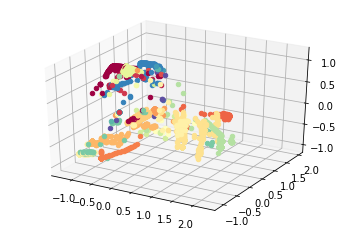

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(data)): 
    ax.scatter(data[i][0], data[i][1], data[i][2], c=[gt_color_dict[labels[i]]])
plt.show()

- 보다시피 명확한 시각화가 되지 않는다. 또한 다른 color에 의해 가려지는 경우도 있다. 다른 방법을 이용하는 것이 나을 것이라고 생각된다.

In [26]:
n_clusters = len(set(unique_labels)) 
kmeans = KMeans(n_clusters=n_clusters) 
kmeans.fit(data)

KMeans(n_clusters=23)

KMeans(n_clusters=23)

In [27]:
kmeans_label = kmeans.labels_
kmeans_unique_labels = list(set(kmeans_label)) # kmeans_label에 있는 것만 가져와서 강제로 리스트로 변환.
kmeans_color_dict = gen_color_dict(kmeans_unique_labels, colors)

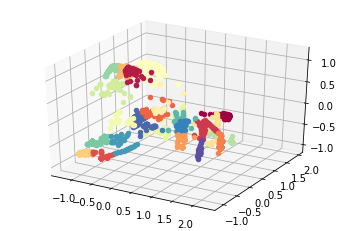

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(data)): 
    ax.scatter(data[i][0], data[i][1], data[i][2], c=[kmeans_color_dict[kmeans_label[i]]])
plt.show()

In [29]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, kmeans_label)) 
print("Completeness: %0.3f" % metrics.completeness_score(labels, kmeans_label)) 
print("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans_label))

Homogeneity: 0.839
Completeness: 0.747
V-measure: 0.790


- Homogeneity : Cluster의 순수함
- Completeness : 특정 label이 Cluster에 잘 들어가 있는지

위의 두 특징은 주어가 어떤 것인지에 따라 판단할 수 있다

- V-measure : Homogeneity와 Completeness 의 조화 평균

PCA, scaler, K 개수 조정하여 성능 조정

### DBSCAN
- Density 기반의 clustering algorithm
- 알고리즘을 설명하기 위해 다음 5가지 용어를 사용

Core, Eps, Noise, MinPts, Border

Algorithm
1. 임의의 오브젝트 P를 선택 
2. Eps와 MinPts를 만족하는 P와 연결된 모든 포인트를 탐색 
3. 
 - 만약 P가 Core 라면 새로운 클러스터를 생성 
 - 만약 P가 Border 또는 Noise 라면, 데이터베이스 내의 다른 오브젝트를 P로 선택 

4. 모든 오브젝트를 방문할 때까지 반복